# 训练一个人脸识别系统

In [1]:
import numpy as np
import tensorflow as tf
import sys
import os

In [2]:
image_path = "../datasets/lfw_mtcnnpy_160/"
files_data = "../datasets/files_data.txt"
model_path = "../models/20180402-114759"

### 将图片名称和标签保存到文件中，一一对应

dirs = os.listdir(path)

with open(files_data, 'w+') as fp:
    for dir_name in dirs:
        dir = os.path.join(path, dir_name)
        if not os.path.isdir(dir):
            continue
        for file in os.listdir(dir):
            fp.write(file)
            fp.write("\t")
            fp.write(dir_name)
            fp.write("\n")

### 获取部分人脸数据

In [3]:
image_list = []
label_list = []
with open(files_data,'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tmp1, tmp2 = [i for i in line.split()]
        image_list.append(tmp1)
        label_list.append(tmp2)

In [4]:
from src import knn_clf

In [7]:
image_size = 160
margin = 44
gpu_memory_fraction = 1.0
image_list = image_list[:1500]
label_list = label_list[:1500]

### 人脸检测并对齐

In [8]:
images = knn_clf.load_and_align_data(image_path, label_list, image_list, image_size, margin, gpu_memory_fraction)

Creating networks and loading parameters


In [24]:
images.shape

(1500, 160, 160, 3)

In [11]:
with tf.Graph().as_default():

        with tf.Session() as sess:

            # Load the model
            knn_clf.facenet.load_model(model_path)

            # Get input and output tensors
            images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
            embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
            
            phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

            # Run forward pass to calculate embeddings
            feed_dict = {images_placeholder: images, phase_train_placeholder: False}
            emb = sess.run(embeddings, feed_dict=feed_dict)
            print("shape of emb is", emb.shape)
            
#             nrof_images = len(label_list)
            
#             print('Images:')
#             for i in range(nrof_images):
#                 print('%1d: %s' % (i, image_list[i]))
#             print('')

#             # Print distance matrix
#             print('Distance matrix')
#             print('    ', end='')
#             for i in range(nrof_images):
#                 print('    %1d     ' % i, end='')
#             print('')
#             for i in range(nrof_images):
#                 print('%1d  ' % i, end='')
#                 for j in range(nrof_images):
#                     dist = np.sqrt(np.sum(np.square(np.subtract(emb[i, :], emb[j, :]))))
#                     print('  %1.4f  ' % dist, end='')
#                 print('')

Model directory: ../models/20180402-114759
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from ../models/20180402-114759/model-20180402-114759.ckpt-275
shape of emb is (1500, 512)


In [12]:
train_x = emb

In [13]:
train_y = np.array(label_list)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=.3, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1050, 512) (1050,) (450, 512) (450,)


In [15]:
# KNN Classifier  
def knn_classifier(train_x, train_y):  
    from sklearn.neighbors import KNeighborsClassifier  
    model = KNeighborsClassifier()  
    model.fit(train_x, train_y)  
    return model  

In [16]:
import sklearn
classifiers = knn_classifier 
model = classifiers(X_train, y_train)  
predict = model.predict(X_test)  

accuracy = sklearn.metrics.accuracy_score(y_test, predict)  
print ('accuracy: %.2f%%' % (100 * accuracy)  )

accuracy: 62.67%


In [19]:
model.predict(train_x[0].reshape(1, -1))

array(['Mukesh_Ambani'], dtype='<U27')

In [21]:
import matplotlib.pyplot as plt
from skimage import io

In [22]:
path = os.path.join(image_path, label_list[0]+"/"+image_list[0])

In [23]:
path

'../datasets/lfw_mtcnnpy_160/Mukesh_Ambani/Mukesh_Ambani_0002.png'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


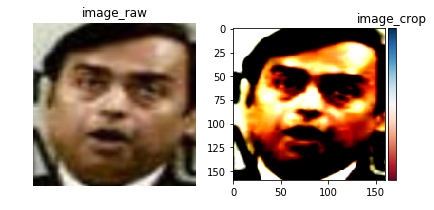

In [35]:
img_raw = io.imread(path)
img_crop = images[0]
plt.figure(1)
plt.subplot(121)
io.imshow(img_raw)
plt.title("image_raw")
plt.axis("off")
plt.subplot(122)
io.imshow(img_crop)
plt.title("image_crop")
plt.axis("off")
plt.show()